<a href="https://colab.research.google.com/github/kangdoung/CS114.K21/blob/master/Do_an_cuoi_ky.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from align import AlignDlib
alignment = AlignDlib('shape_predictor_68_face_landmarks.dat')

def align_face(face):
    (h,w,c) = face.shape
    bb = dlib.rectangle(0, 0, w, h)
    return alignment.align(96, face, bb,landmarkIndices=AlignDlib.OUTER_EYES_AND_NOSE)

In [4]:
import pandas as pd
import os

=== process image MyTam2.jpg : 1 out of 5
found 0 faces
cant find
=== process image MyTam1.jpg : 2 out of 5
found 1 faces


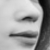

=== process image MyTam3.jpg : 3 out of 5
found 1 faces


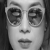

=== process image MyTam4.jpg : 4 out of 5
found 1 faces


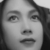

=== process image MyTam5.jpg : 5 out of 5
found 1 faces


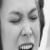

  0    1    2    3    4    5    6     ... 2493 2494 2495 2496 2497 2498 2499
0    0    0    0    0    0    0    0  ...    0    0    0    0    0    0    0
1  213  211  210  208  206  203  199  ...   90   96   96  114  145  155  166
2   65   62   57   46   30   24   38  ...   86   71   78   84   77   85   88
3  201  195  158   76   31   36   56  ...   20   20   20   20   20   21   20
4   64   78  106  135  151  161  171  ...  240  233  222  220  220  215  212

[5 rows x 2500 columns]
  label
0   MyT
1   MyT
2   MyT
3   MyT
4   MyT


In [13]:
import cv2
from google.colab import files
from google.colab.patches import cv2_imshow
path = 'drive/My Drive/Image Processing/My Tam'
folder = path
X = pd.DataFrame(columns=range(2500))
Y = pd.DataFrame(columns=['label'])
i=1
for image in os.listdir(folder):
    print('=== process image', image, ':', i, 'out of', len(os.listdir(folder)), sep=' ')
    faceimg = folder + "/" + image
    img = cv2.imread(faceimg)
    cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    faces = cascade.detectMultiScale(img)
    print('found', len(faces), 'faces', sep=' ')
    if len(faces) != 0:
        (x, y, w, h) = faces[0]
        r = max(w, h) / 2
        centerx = x + w / 2
        centery = y + h / 2
        nx = int(centerx - r)
        ny = int(centery - r)
        nr = int(r * 2)

        new_img = img[ny:ny+nr, nx:nx+nr]
        new_img = cv2.resize(new_img, (50,50))
        new_img = cv2.cvtColor(new_img, cv2.COLOR_BGR2GRAY)
        cv2_imshow(new_img)
        flat = new_img.flatten()
        t = pd.DataFrame([flat])
    else:
        print('cant find')
        t = pd.DataFrame([[0]*2500], columns = range(2500))
    i+=1
    X=X.append(t, ignore_index=True)
    Y=Y.append({'label':image[0:3]},ignore_index=True)
    
print(X)
print(Y)

In [14]:
from sklearn.svm import SVC

model = SVC()
model.fit( X,  Y.values.ravel()  )

print(model)

ValueError: ignored

In [18]:
!pip install google_images_download

     |████████████████████████████████| 911kB 3.8MB/s 
  Created wheel for google-images-download: filename=google_images_download-2.8.0-py2.py3-none-any.whl size=14550 sha256=5dad89f33e15a6f59ce31310b204a399c43eb232385f470fdd2d4662eb25dbc5
  Stored in directory: /root/.cache/pip/wheels/1f/28/ad/f56e7061e1d2a9a1affe2f9c649c2570cb9198dd24ede0bbab
Successfully built google-images-download


In [21]:
!pip install keras